# Automatic License Blurring Using YOLO AI Model

# 1. Setup & Installation

In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install ultralytics
#Downloades the required packages.

# 2. Importing Required Libraries

In [ ]:
from matplotlib import pyplot as plt
from ultralytics import YOLO
import pandas as pd
import numpy as np
import torch
import cv2
#Imports the required libraries.

# 3. Initialization and Configuration

In [ ]:
path = r"Egyptian License Plate\dataset.yaml"
# Load the path of the dataset.yaml file in the dataset.

# 4. Model Training
#### Training Yolov8n, Yolov10n, and Yolo11n. Each gets trained on 3, 5 and 10 epochs.

## YOLOV8n

In [ ]:
Yolov8n_3_Epochs = YOLO("yolov8n.pt")
result = Yolov8n_3_Epochs.train(data = path, epochs = 3, imgsz = 640)
#Train YOLOV8n using only 3 epochs.

In [ ]:
Yolov8n_5_Epochs = YOLO(r"runs\detect\train1\weights\last.pt")
result = Yolov8n_5_Epochs.train(data = path, epochs = 2, imgsz = 640, resume = True)
#Loads the previous YOLOV8n and adds 2 more epochs to reach a total of 5 epochs.

In [ ]:
Yolov8n_10_Epochs = YOLO(r"runs\detect\train2\weights\last.pt")
result = Yolov8n_10_Epochs.train(data = path, epochs = 5, imgsz = 640, resume = True)
#Loads the previous YOLOV8n and adds 5 more epochs to reach a total of 10 epochs.

## YOLOV10n

In [ ]:
Yolov10n_3_Epochs = YOLO("yolov10n.pt")
result = Yolov10n_3_Epochs.train(data = path, epochs = 3, imgsz = 640)
#Train YOLOV10n using only 3 epochs.

In [ ]:
Yolov10n_5_Epochs = YOLO(r"runs\detect\train3\weights\last.pt")
result = Yolov10n_5_Epochs.train(data = path, epochs = 2, imgsz = 640)
#Loads the previous YOLOV10n and adds 2 more epochs to reach a total of 5 epochs.

In [ ]:
Yolov10n_10_Epochs = YOLO(r"runs\detect\train4\weights\last.pt")
result = Yolov10n_10_Epochs.train(data = path, epochs = 5, imgsz = 640)
#Loads the previous YOLOV10n and adds 5 more epochs to reach a total of 10 epochs.

## YOLO11n

In [ ]:
Yolov11n_3_Epochs = YOLO("yolo11n.pt")
result = Yolov11n_3_Epochs.train(data = path, epochs = 3, imgsz = 640)
#Train YOLOV10n using only 3 epochs.

In [ ]:
Yolov11n_5_Epochs = YOLO(r"runs\detect\train5\weights\last.pt")
result = Yolov11n_5_Epochs.train(data = path, epochs = 2, imgsz = 640, resume = True)
#Loads the previous YOLOV10n and adds 2 more epochs to reach a total of 5 epochs.

In [ ]:
Yolov10n_10_Epochs = YOLO(r"runs\detect\train6\weights\last.pt")
result = Yolov11n_10_Epochs.train(data = path, epochs = 5, imgsz = 640, resume = True)
#Loads the previous YOLOV10n and adds 5 more epochs to reach a total of 10 epochs.

# 5. Evaluation and Visualization
#### Create a table using "data frame" to organize the training data, and then display the information using a histogram for each model and specific information

## Loading Results

In [ ]:
model_metrics = []

for model_name, file_path in {
    'YOLOv8n 3 Epochs': r'Yolo8n\Yolo8n - 3 Epoch\results.csv',
    'YOLOv8n 5 Epochs': r'Yolo8n\Yolo8n - 5 Epoch\results.csv',
    'YOLOv8n 10 Epochs': r'Yolo8n\Yolo8n - 10 Epoch\results.csv',

    'YOLOv10n 3 Epochs': r'Yolo10n\Yolo10n - 3 Epoch\results.csv',
    'YOLOv10n 5 Epochs': r'Yolo10n\Yolo10n - 5 Epoch\results.csv',
    'YOLOv10n 10 Epochs': r'Yolo10n\Yolo10n - 10 Epoch\results.csv',

    'YOLOv11n 3 Epochs': r'Yolo11n\Yolo11n - 3 Epoch\results.csv',
    'YOLOv11n 5 Epochs': r'Yolo11n\Yolo11n - 5 Epoch\results.csv',
    'YOLOv11n 10 Epochs': r'Yolo11n\Yolo11n - 10 Epoch\results.csv'
}.items():
    df = pd.read_csv(file_path)
    last = df.iloc[-1]
    model_metrics.append({
        'Model': model_name,
        'Epochs': last['epoch'],
        'Precision': last['metrics/precision(B)'],
        'Recall': last['metrics/recall(B)'],
        'mAP50': last['metrics/mAP50(B)'],
        'mAP50-95': last['metrics/mAP50-95(B)'],
        'val_box_loss': last['val/box_loss'],
        'val_cls_loss': last['val/cls_loss'],
        'val_dfl_loss': last['val/dfl_loss'],
    })

comparison_df = pd.DataFrame(model_metrics)
comparison_df

Model  Epochs  Precision   Recall    mAP50  mAP50-95  \
0    YOLOv8n 3 Epochs     3.0    0.98654  0.98815  0.98709   0.88394   
1    YOLOv8n 5 Epochs     5.0    0.99264  0.98578  0.99460   0.91655   
2   YOLOv8n 10 Epochs    10.0    0.99373  0.99289  0.99500   0.92085   
3   YOLOv10n 3 Epochs     3.0    0.95412  0.94563  0.98577   0.87905   
4   YOLOv10n 5 Epochs     5.0    0.96116  0.97636  0.98796   0.88953   
5  YOLOv10n 10 Epochs    10.0    0.97160  0.97064  0.99131   0.92052   
6   YOLOv11n 3 Epochs     3.0    0.98319  0.99527  0.99270   0.88465   
7   YOLOv11n 5 Epochs     5.0    0.98136  0.99574  0.99450   0.90076   
8  YOLOv11n 10 Epochs    10.0    0.99667  0.99587  0.99546   0.92258   

   val_box_loss  val_cls_loss  val_dfl_loss  
0       0.46160       0.52975       0.81665  
1       0.42767       0.28606       0.80893  
2       0.41175       0.24319       0.80471  
3       1.02686       1.54559       1.63541  
4       0.96184       0.50583       1.63228  
5       0.86805       0.48508       1.61117  
6       0.48287       0.50047       0.81475  
7       0.46902       0.30610       0.81697  
8       0.40706       0.25880       0.79994

## Precision Histogram

#### Measures of how accurate the model's positive predictions are. High precision means most of the detected license plates are actually correct. Higher values mean better model

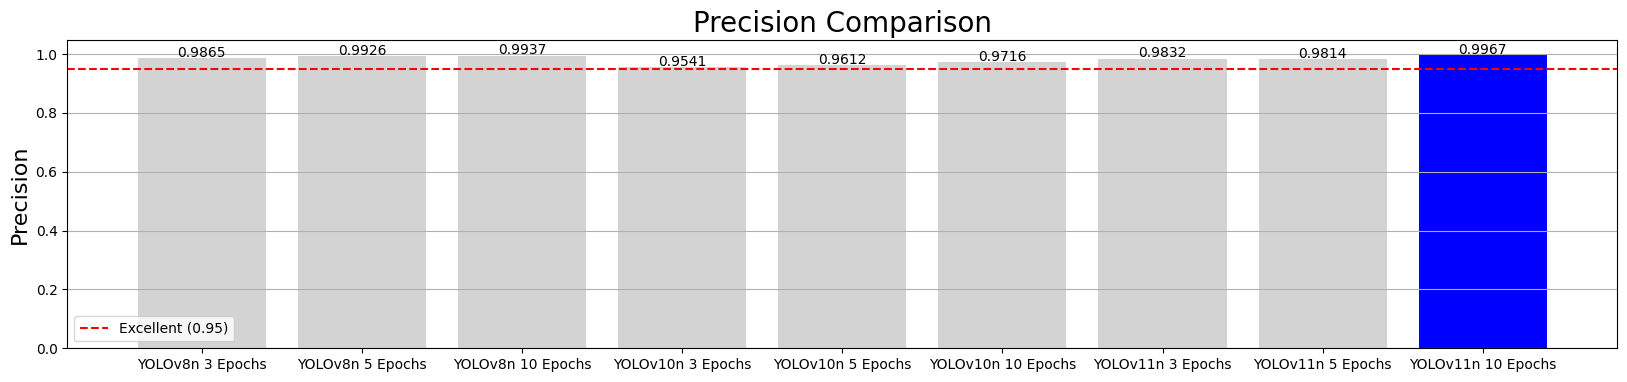

In [148]:
plt.figure(figsize=(20, 4))

# Highlight best value
colors = ['lightgray'] * len(comparison_df)
colors[comparison_df['Precision'].idxmax()] = 'blue'

# Create bar chart
bars = plt.bar(comparison_df['Model'], comparison_df['Precision'], color=colors)

# Labels & title
plt.title('Precision Comparison', fontsize = 20)
plt.ylabel('Precision', fontsize = 16)

# Add benchmark line
plt.axhline(0.95, color='red', linestyle='--', label='Excellent (0.95)')
plt.legend()

# Add value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f'{bar.get_height():.4f}', ha='center')

# Add grid lines on y-axis 
plt.grid(True, axis='y')
plt.show()

## Recall Histogram

#### Measures of how well the model finds all relevant objects. High recall means the model detects nearly all license plates. Higher values mean better model

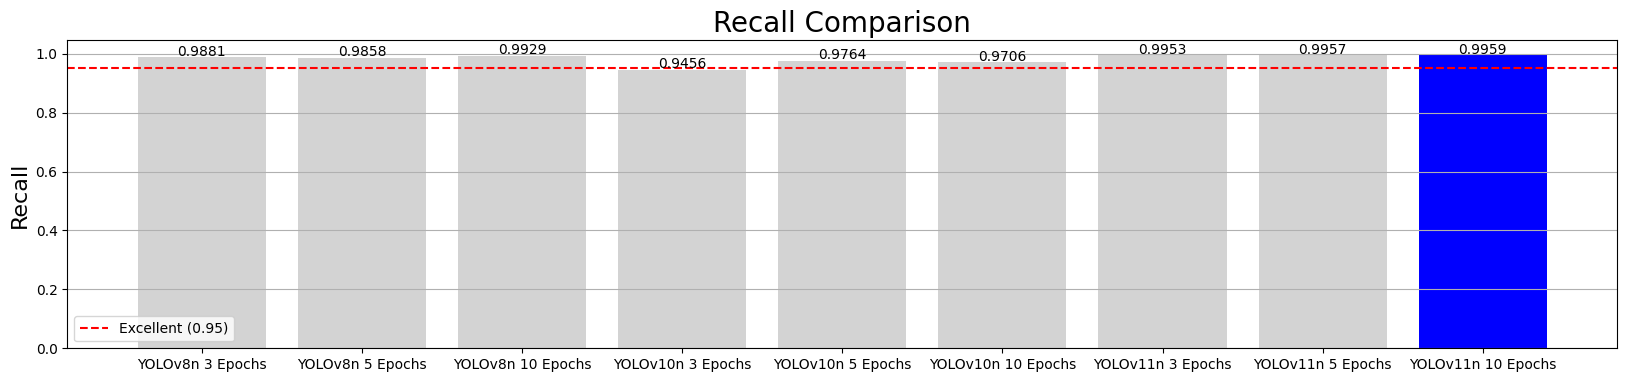

In [150]:
plt.figure(figsize=(20, 4))

# Highlight best value
colors = ['lightgray'] * len(comparison_df)
colors[comparison_df['Recall'].idxmax()] = 'blue'

# Create bar chart
bars = plt.bar(comparison_df['Model'], comparison_df['Recall'], color=colors)

# Labels & title
plt.title('Recall Comparison', fontsize = 20)
plt.ylabel('Recall', fontsize = 16)

# Add benchmark line
plt.axhline(0.95, color='red', linestyle='--', label='Excellent (0.95)')
plt.legend()

# Add value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f'{bar.get_height():.4f}', ha='center')

# Add grid lines on y-axis 
plt.grid(True, axis='y')
plt.show()

## mAP50 Histogram

#### The mean Average Precision at IoU ≥ 0.5. This metric combines localization and classification performance. High mAP50 indicates the model is good at placing bounding boxes correctly and identifying the objects inside. Higher values mean better model

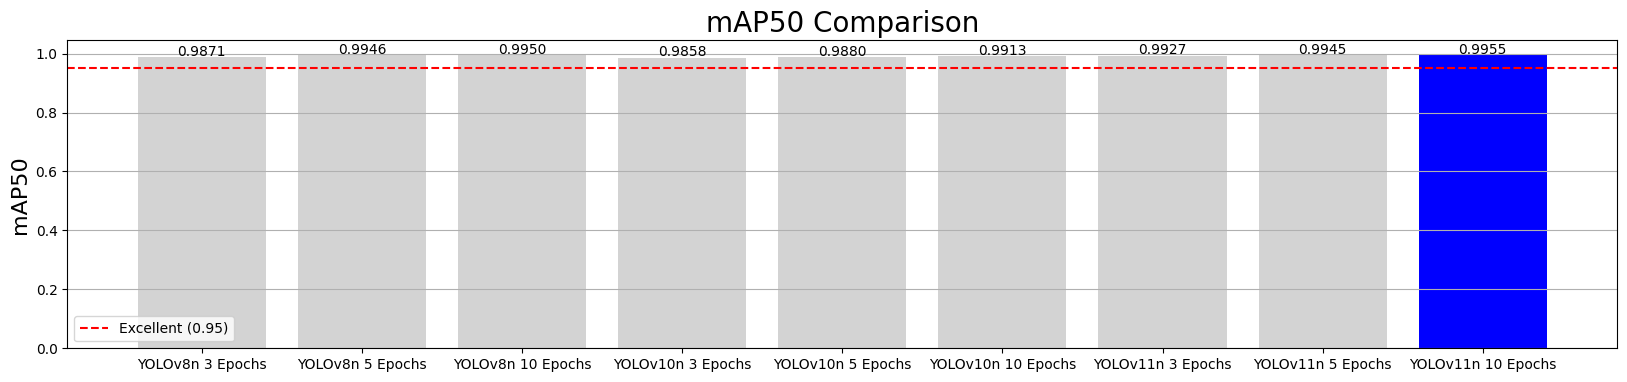

In [153]:
plt.figure(figsize=(20, 4))

# Highlight best value
colors = ['lightgray'] * len(comparison_df)
colors[comparison_df['mAP50'].idxmax()] = 'blue'

# Create bar chart
bars = plt.bar(comparison_df['Model'], comparison_df['mAP50'], color=colors)

# Labels & title
plt.title('mAP50 Comparison', fontsize = 20)
plt.ylabel('mAP50', fontsize = 16)

# Add benchmark line
plt.axhline(0.95, color='red', linestyle='--', label='Excellent (0.95)')
plt.legend()

# Add value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f'{bar.get_height():.4f}', ha='center')

# Add grid lines on y-axis 
plt.grid(True, axis='y')
plt.show()

## mAP50-95 Histogram

#### A stricter version of mAP, averaging over multiple IoU thresholds (from 0.5 to 0.95). It reflects the model’s ability to make precise detections across varying strictness. Lower than mAP50, but more reliable for fine-tuning. Higher values mean better model

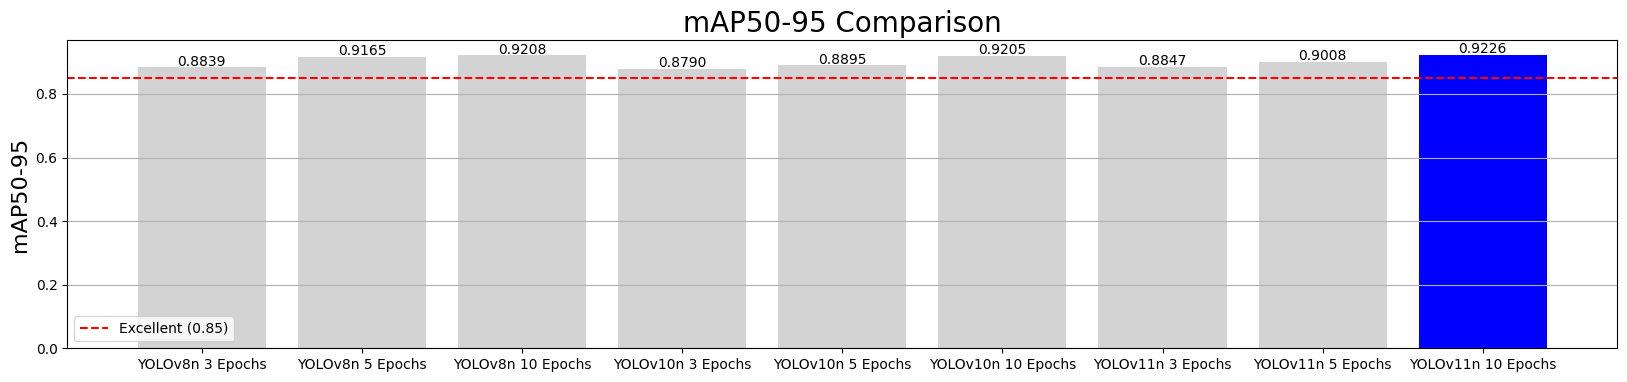

In [156]:
plt.figure(figsize=(20, 4))

# Highlight best value
colors = ['lightgray'] * len(comparison_df)
colors[comparison_df['mAP50-95'].idxmax()] = 'blue'

# Create bar chart
bars = plt.bar(comparison_df['Model'], comparison_df['mAP50-95'], color=colors)

# Labels & title
plt.title('mAP50-95 Comparison', fontsize = 20)
plt.ylabel('mAP50-95', fontsize = 16)

# Add benchmark line
plt.axhline(0.85, color='red', linestyle='--', label='Excellent (0.85)')
plt.legend()

# Add value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f'{bar.get_height():.4f}', ha='center')

# Add grid lines on y-axis 
plt.grid(True, axis='y')
plt.show()

## val_box_loss Histogram

#### Validation loss related to the bounding box regression. Indicates how closely the predicted boxes match the actual object positions. Lower values mean more accurate localization. Lower values mean better model

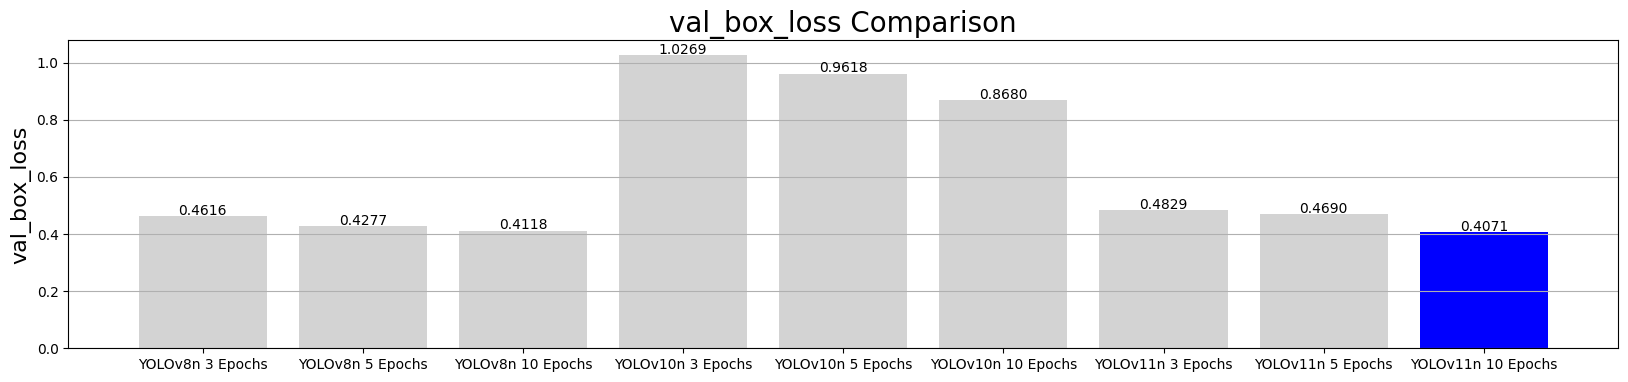

In [159]:
plt.figure(figsize=(20, 4))

# Highlight best value
colors = ['lightgray'] * len(comparison_df)
colors[comparison_df['val_box_loss'].idxmin()] = 'blue'

# Create bar chart
bars = plt.bar(comparison_df['Model'], comparison_df['val_box_loss'], color=colors)

# Labels & title
plt.title('val_box_loss Comparison', fontsize = 20)
plt.ylabel('val_box_loss', fontsize = 16 )

# Add value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f'{bar.get_height():.4f}', ha='center')

# Add grid lines on y-axis 
plt.grid(True, axis='y')
plt.show()

## val_cls_loss Histogram

#### Classification loss during validation. Measures how well the model predicts the correct class (license plate). High values could mean misclassifications. Lower values mean better model

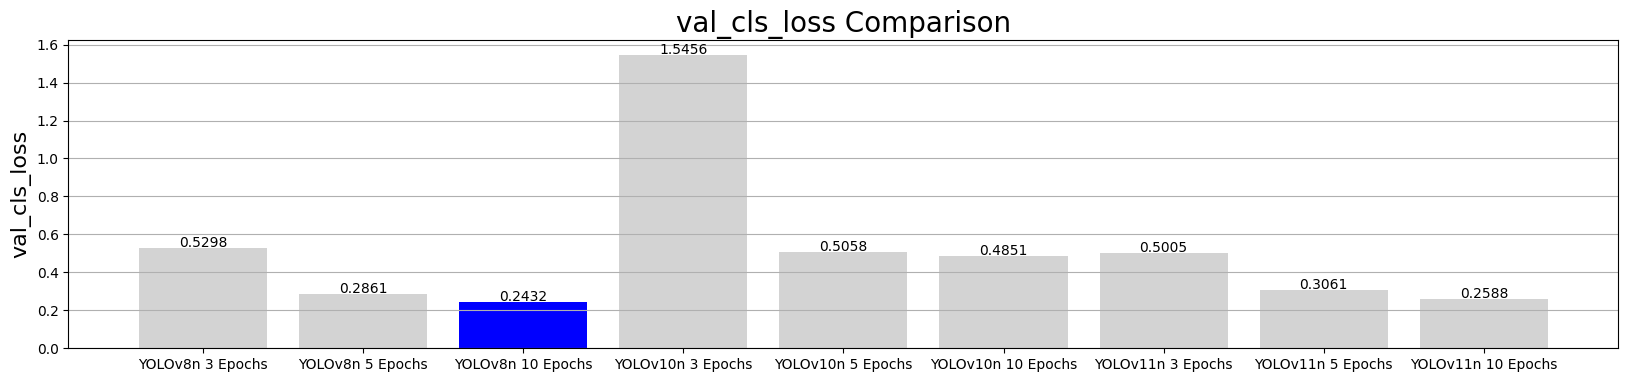

In [162]:
plt.figure(figsize=(20, 4))

# Highlight best value
colors = ['lightgray'] * len(comparison_df)
colors[comparison_df['val_cls_loss'].idxmin()] = 'blue'

# Create bar chart
bars = plt.bar(comparison_df['Model'], comparison_df['val_cls_loss'], color=colors)

# Labels & title
plt.title('val_cls_loss Comparison', fontsize = 20)
plt.ylabel('val_cls_loss', fontsize = 16)

# Add value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f'{bar.get_height():.4f}', ha='center')

# Add grid lines on y-axis 
plt.grid(True, axis='y')
plt.show()

## val_dfl_loss Histogram

#### Distribution Focal Loss — used to refine bounding box predictions in YOLO. It helps improve boundary alignment. Lower values indicate smoother and more precise box outputs. Lower values mean better model

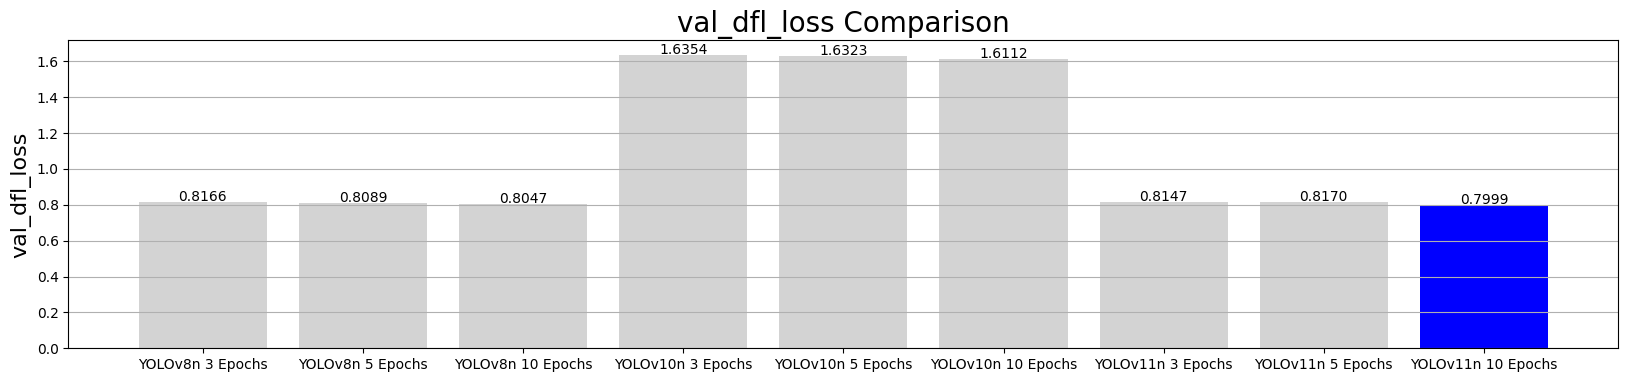

In [166]:
plt.figure(figsize=(20, 4))

# Highlight best value
colors = ['lightgray'] * len(comparison_df)
colors[comparison_df['val_dfl_loss'].idxmin()] = 'blue'

# Create bar chart
bars = plt.bar(comparison_df['Model'], comparison_df['val_dfl_loss'], color=colors)

# Labels & title
plt.title('val_dfl_loss Comparison', fontsize = 20)
plt.ylabel('val_dfl_loss', fontsize = 16)

# Add value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f'{bar.get_height():.4f}', ha='center')

# Add grid lines on y-axis 
plt.grid(True, axis='y')
plt.show()

# 6. Re-Training Best model (YOLOv11n)
#### Continue training the model to 50 epochs instead of 10

In [ ]:
Yolov11n_50_Epochs = YOLO(r"runs\detect\train7\weights\last.pt")
result = Yolov11n_50_Epochs.train(data = path, epochs = 40, imgsz = 640, resume = True)
#Loads the previous YOLOV10n and adds 40 more epochs to reach a total of 50 epochs.

# 7. Applying The Best Model to Images
#### Use the model on a sample of images of different angles, lighting conditions, and plate styles

In [ ]:
# Load model and images 
BestModel = YOLO(r"Yolo11n/Yolo11n - 50 Epoch/weights/best.pt")
image_paths = [
    r"Test Images\All License Plates Styles.png",
    r"Test Images\2 Cars Day.jpg",
    r"Test Images\2 Cars Night.jpg",
    r"Test Images\Black Plate.jpg",
    r"Test Images\Blur Grade A.jpg",
    r"Test Images\Blur Grade B.jpeg",
    r"Test Images\Blur Grade C.jpeg",
    r"Test Images\Far .jpeg",
    r"Test Images\Green Plate.jpeg",
    r"Test Images\Grey Plate.jpg",
    r"Test Images\Multiple Cars Day.jpg",
    r"Test Images\Multiple Cars Midday.jpg",
    r"Test Images\Orange Plate.jpg",
    r"Test Images\Police Plate.jpg",
    r"Test Images\Red Plate.jpg",
    r"Test Images\Yellow Plate.jpg"
]


image 1/1 C:\Users\gosta\Desktop\Yolo Models Comparison\Test Images\All License Plates Styles.png: 416x640 9 license_plates, 32.0ms
Speed: 5.9ms preprocess, 32.0ms inference, 5.3ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 C:\Users\gosta\Desktop\Yolo Models Comparison\Test Images\2 Cars Day.jpg: 480x640 2 license_plates, 18.0ms
Speed: 3.9ms preprocess, 18.0ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 C:\Users\gosta\Desktop\Yolo Models Comparison\Test Images\2 Cars Night.jpg: 640x640 2 license_plates, 18.4ms
Speed: 5.7ms preprocess, 18.4ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\gosta\Desktop\Yolo Models Comparison\Test Images\Black Plate.jpg: 640x480 1 license_plate, 26.3ms
Speed: 6.7ms preprocess, 26.3ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 C:\Users\gosta\Desktop\Yolo Models Comparison\Test Images\Blur Grade A.jpg: 640x448 1 license_plate, 27.8ms
Spee

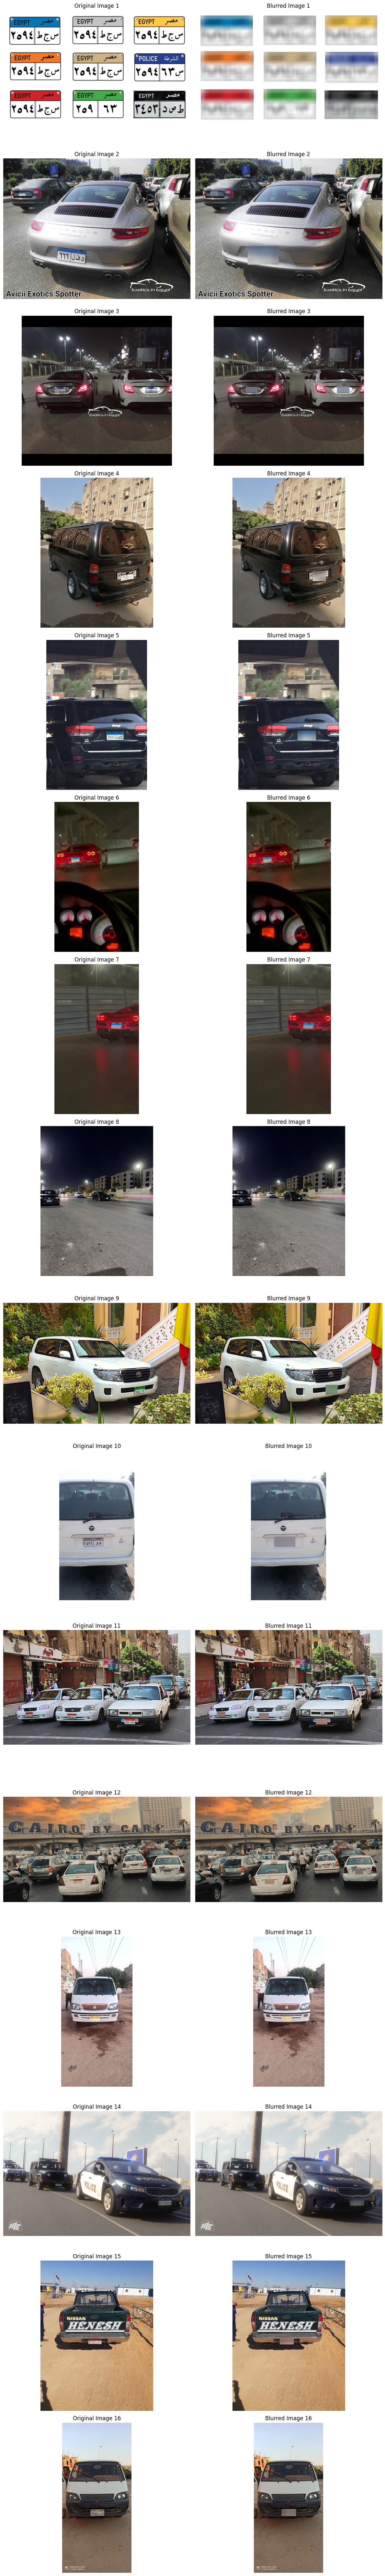

In [134]:
# Store pairs of original and blurred images
image_pairs = []

for img_path in image_paths:
    original = cv2.imread(img_path)
    image = original.copy()

    # Give image to model
    results = BestModel(img_path)
    
    # Apply Gaussian blur
    for r in results:
        if r.boxes is not None:
            for box in r.boxes.xyxy:
                x1, y1, x2, y2 = map(int, box.tolist())
                roi = image[y1:y2, x1:x2]
                blurred = cv2.GaussianBlur(roi, (65, 65), 30)
                image[y1:y2, x1:x2] = blurred

    # Convert BGR to RGB
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    blurred_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_pairs.append((original_rgb, blurred_rgb))

# Display the images before and afer
n = len(image_pairs)
plt.figure(figsize=(12, 5 * n))

for i, (orig, blur) in enumerate(image_pairs):
    plt.subplot(n, 2, 2 * i + 1)
    plt.imshow(orig)
    plt.title(f"Original Image {i+1}")
    plt.axis('off')

    plt.subplot(n, 2, 2 * i + 2)
    plt.imshow(blur)
    plt.title(f"Blurred Image {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# 8. Applying the Best Model to Video

In [ ]:
input_video = r"Super Cars in Egypt.mp4"
output_video = r"Desktop/Output.mp4"

# Open video
video = cv2.VideoCapture(input_video)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = int(video.get(cv2.CAP_PROP_FPS))
frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(output_video, fourcc, fps, (frame_width, frame_height))

# Process each frame
while video.isOpened():
    ret, frame = video.read()
    if not ret:
        break

    # Run detection
    results = BestModel(frame)

    for r in results:
        if r.boxes is not None:
            for box in r.boxes.xyxy:
                x1, y1, x2, y2 = map(int, box.tolist())
                roi = frame[y1:y2, x1:x2]
                blurred = cv2.GaussianBlur(roi, (25, 25), 30)
                frame[y1:y2, x1:x2] = blurred

    # Write processed frame to output video
    out.write(frame)
    
cap.release()
out.release()
cv2.destroyAllWindows()
print("Video processing complete.")